<h1 style="font-size:3rem;color:orange;">Homework 2</h1

# Problem 3

In [17]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

'\nSpyder Editor\n\nThis is a temporary script file.\n'

In [2]:
#%% Step 1- imports data into dataframe
import pandas as pa;
import timeit;

col_names=['md_TPSA', 'md_SAacc', 'md_H-050', 'md_MLOGP', 'md_RDCHI', 'md_GATS1p', 'md_nN', 'md_C-040', 'qr_LC50']
df = pa.read_table('C:/Users/danma/Documents/STA 4365/HW2/qsar_aquatic_toxicity.csv', sep=';', header=None, names=col_names)
print(df.head())
col_names.remove('qr_LC50')
col_names = [elem.replace('md_', '') for elem in col_names]

   md_TPSA  md_SAacc  md_H-050  md_MLOGP  md_RDCHI  md_GATS1p  md_nN  \
0     0.00       0.0         0     2.419     1.225      0.667      0   
1     0.00       0.0         0     2.638     1.401      0.632      0   
2     9.23      11.0         0     5.799     2.930      0.486      0   
3     9.23      11.0         0     5.453     2.887      0.495      0   
4     9.23      11.0         0     4.068     2.758      0.695      0   

   md_C-040  qr_LC50  
0         0    3.740  
1         0    4.330  
2         0    7.019  
3         0    6.723  
4         0    5.979  


In [3]:
#%% Step 2 - splits data into x and y

from sklearn.model_selection import train_test_split as TTS

x = df.filter(regex='md')
y = df.filter(regex='qr')
#turns y into a 1-d array instead of a dataframe column
y = y.to_numpy()
y = y.ravel()

#splits into training and test data
TS = 0.1 #for tuning
print("Test Size = ", TS, "\n")
x_train, x_test, y_train, y_test = TTS(x,y,test_size=TS, random_state=42)

del df #clear data for variable explorer

Test Size =  0.1 



In [4]:
#%% Step 3 scale and center columns

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)

x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
del scalar #clear data for variable explorer

#To tune hyperparameters for each model, you can either use cross-validation
#or hand-tune by examining the model performance for reasonable values of the
#hyper-parameters

#Apply your models to the test set. Reoprt MSE along with R^2 for each model
#Report the most meaningful predictors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

In [5]:
#%% Step 4 Linear Regression
print("Linear Regression Results:")
from sklearn.linear_model import LinearRegression

#Need to tune hyperparameters for better results (R^2 should .7-.9)


Linear Regression Results:


In [6]:
#%% Step 4.1 Tune Hyperparameters for Linear Regression
start = timeit.default_timer()
#List Hyperparameters that we want to tune
print('Lin Reg Hyperparameters:')
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
#Convert to dictionary
reg_hyperparameters = {'fit_intercept':fit_intercept, 'normalize':normalize, 'copy_X':copy_X}
#Create new reg object
reg_2 = LinearRegression()
#use gridsearch
reg_gs = GridSearchCV(reg_2, reg_hyperparameters, cv=10, verbose=1)
#Fit the model
best_reg = reg_gs.fit(x,y)
#print the values of the best hyperparameters
print('Best fit_intercept:', best_reg.best_estimator_.get_params()['fit_intercept'])
print('Best normalize:', best_reg.best_estimator_.get_params()['normalize'])
print('Best copy_X:', best_reg.best_estimator_.get_params()['copy_X'])

#clear variables for variable explorer
del fit_intercept, normalize, copy_X, reg_hyperparameters, reg_2, reg_gs, best_reg

stop = timeit.default_timer()
print('Time: %.2f' %(stop-start), '\n')

Lin Reg Hyperparameters:
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best fit_intercept: True
Best normalize: False
Best copy_X: True
Time: 0.24 



MSE: 1.63
R²: 0.37 



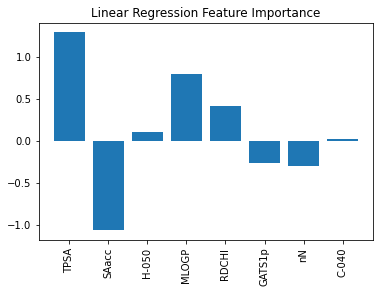

In [7]:
#%% Step 4.2 Run model with best hyperparameters
reg = LinearRegression(fit_intercept=True, normalize=False,copy_X=True).fit(x_train, y_train)

reg_y_pred = reg.predict(x_test)

print("MSE: %.2f" %mean_squared_error(y_test, reg_y_pred))
print("R\u00b2: %.2f \n" %r2_score(y_test, reg_y_pred))

# get importance
importance = reg.coef_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(ticks=range(len(importance)), labels=col_names, rotation='vertical')
pyplot.title("Linear Regression Feature Importance")
pyplot.show()
#clear variables for variable explorer
del reg, reg_y_pred, importance


In [8]:
#%% Step 5 KNN Regression
print("KNN Regression Results:")
from sklearn.neighbors import KNeighborsRegressor

KNN Regression Results:


In [9]:
#%% Step 5.1 Tune HyperParameters for KNN Regression
start = timeit.default_timer()
#List Hyperparameters that we want to tune
print('KNN Hyperparameters:')
leaf_size = list(range(1,4))#tested with 1-50
n_neighbors = list(range(1,4))#tested with 1-50
p=[1,2]
#Convert to dictionary
knn_hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#use gridsearch
knn_gs = GridSearchCV(knn_2, knn_hyperparameters, cv=10, verbose=1)
#Fit the model
best_knn = knn_gs.fit(x,y)
#print the values of the best hyperparameters
print('Best leaf_size:', best_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])

#clear variables for variable explorer
del leaf_size, n_neighbors, p, knn_hyperparameters, knn_2, knn_gs, best_knn

stop = timeit.default_timer()
print('Time: %.2f' %(stop-start), '\n')

KNN Hyperparameters:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best leaf_size: 2
Best p: 1
Best n_neighbors: 3
Time: 0.53 



In [10]:
#%% Step 5.2 Run model with best hyperparameters
knn = KNeighborsRegressor(n_neighbors=3, leaf_size=2, p=1)

knn.fit(x_train, y_train)

knn_y_predict = knn.predict(x_test)

print("MSE: %.2f" %mean_squared_error(y_test, knn_y_predict))
print("R\u00b2: %.2f \n" %r2_score(y_test, knn_y_predict))

#no feature importance graphing for knn

#clear variables for variable explorer
del knn, knn_y_predict

MSE: 1.97
R²: 0.24 



In [11]:
#%% Step 6 Random Forest Regression
print("Random Forest Results:")
from sklearn.ensemble import RandomForestRegressor

Random Forest Results:


In [12]:
#%% Step 6.1 Tune Hyperparameters for Random Forest Regression
start = timeit.default_timer()#original run took 20955.3 seconds to cross validate
#List hyperparameters we want to tune
print('RandomForest Hyperparameters')
#n_estimators = [10,50,100,200,400,600,800,1000,1200,1400,1600,1800]#original run
n_estimators=[50,100]
#max_depth = [10,20,30,40,50,60,70,80,90,100,None]#original run
max_depth = [90,100]
#max_features = ['log2', 'auto', 'sqrt']
max_features = ['log2']
#min_samples_leaf = [1,2,4]
min_samples_leaf = [1,2]
#min_samples_split = [2,5,7]
min_samples_split = [2,5]
#convert to dictionary
rf_hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
#create new rf object
rf_2 = RandomForestRegressor()
#use gridsearch
rf_gs = GridSearchCV(rf_2, rf_hyperparameters, cv=10, n_jobs=-1, verbose=1)
#fit the model
best_rf = rf_gs.fit(x,y)
#print the values of the best hyperparameters
print('Best n_estimators:', best_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_rf.best_estimator_.get_params()['max_features'])
print('Best min_samples_leaf:', best_rf.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', best_rf.best_estimator_.get_params()['min_samples_split'])

del n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split, rf_hyperparameters, best_rf, rf_2, rf_gs

stop = timeit.default_timer()
print('Time: %.2f' %(stop-start), '\n')

RandomForest Hyperparameters
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best n_estimators: 50
Best max_depth: 100
Best max_features: log2
Best min_samples_leaf: 2
Best min_samples_split: 2
Time: 3.71 



MSE: 1.74
R²: 0.32 



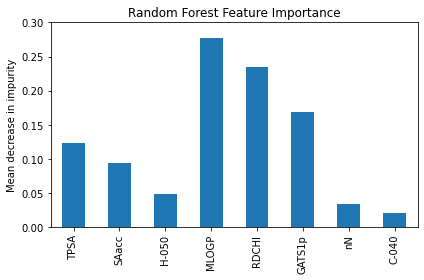

In [13]:
#%% Step 6.2 Run model with best hyperparameters from orignal
rf = RandomForestRegressor(n_estimators=50, max_depth=90, max_features='log2', min_samples_leaf=2, min_samples_split=5)

rf.fit(x_train, y_train)

rf_y_predict = rf.predict(x_test)

#print("Parameters:", rf.get_params()) #for tuning
print("MSE: %.2f" %mean_squared_error(y_test, rf_y_predict))
print("R\u00b2: %.2f \n" %r2_score(y_test, rf_y_predict))

#plot feature importance
importances = rf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pa.Series(importances, index=col_names)
fig, ax = pyplot.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Random Forest Feature Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
ax.set_ylim([0, .3])
pyplot.show()


del rf, rf_y_predict, importances, forest_importances

In [14]:
#%% Step 7 Gradient Boosted Decision Tree Regression
print("Gradient Boosted Decision Tree")
from sklearn.ensemble import GradientBoostingRegressor

#Need to choose the number of trees and learning rate. If you want, you can 
#also experiment with randomly selecting rows and columns when growing each tree

Gradient Boosted Decision Tree


In [15]:
#%% Step 7.1 Tune Hyperparameters for Gradient Boosted Decision Tree Regression
start = timeit.default_timer()

#List hyperparameters we want to tune
print("GradientBoosted Hyperparameters")
#learning_rate = [0.01, 0.02, 0.03, 0.04]#original run
learning_rate = [0.01, 0.02]
#subsample = [0.9, 0.5, 0.2, 0.1]#original run
subsample = [0.2, 0.1]
#n_estimators = [100,200,300, 500, 1000, 1500]#original run
n_estimators = [200,300]
#max_depth = [4,6,8,10]#original run
max_depth = [8,10]
#convert to dictionary
gb_hyperparameters = dict(learning_rate=learning_rate, subsample=subsample, n_estimators=n_estimators, max_depth=max_depth)
#create new gb object
gb_2 = GradientBoostingRegressor()
#use gridsearch
gb_gs = GridSearchCV(gb_2, gb_hyperparameters, cv=10, n_jobs=-1, verbose=2)
#fit the model
best_gb = gb_gs.fit(x,y)
#print the values of the best hyperparameters
print('Best learning_rate:', best_gb.best_estimator_.get_params()['learning_rate'])
print('Best subsample:', best_gb.best_estimator_.get_params()['subsample'])
print('Best n_estimators:', best_gb.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_gb.best_estimator_.get_params()['max_depth'])

del learning_rate, subsample, n_estimators, max_depth, best_gb, gb_hyperparameters, gb_2, gb_gs

stop = timeit.default_timer()
print('Time: %.2f' %(stop-start), '\n')

GradientBoosted Hyperparameters
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best learning_rate: 0.01
Best subsample: 0.1
Best n_estimators: 300
Best max_depth: 8
Time: 1.45 



MSE: 1.78
R²: 0.31 



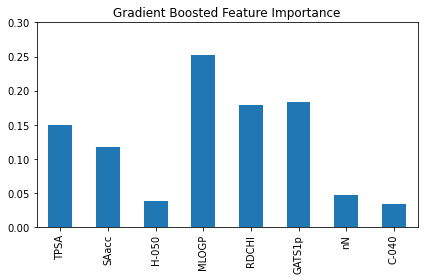

In [16]:
#%% Step 7.2 Run model with best hyperparameters from original
gb = GradientBoostingRegressor(learning_rate=.02, subsample=.2, n_estimators=300, max_depth=8)

gb.fit(x_train, y_train)

gb_y_predict = gb.predict(x_test)

#print("Parameters:", gb.get_params()) #for tuning
print("MSE: %.2f" %mean_squared_error(y_test, gb_y_predict))
print("R\u00b2: %.2f \n" %r2_score(y_test, gb_y_predict))

#plot feature importance
feature_importance = gb.feature_importances_
gradient_importances = pa.Series(feature_importance, index=col_names)
fig, ax = pyplot.subplots()
gradient_importances.plot.bar(ax=ax)
ax.set_title("Gradient Boosted Feature Importance")
fig.tight_layout()
ax.set_ylim([0, .3])
pyplot.show()

del gb, gb_y_predict, feature_importance, gradient_importances, fig, ax